In [269]:
import pandas as pd

In [270]:
df=pd.read_csv('../data/output/categorical_dfs/development_sample_cleaned_categorical.csv') 
df.head() 

,MOB,ID,customer_id,Var1,Var4,Var5,Var6,Var7,Var15,Var16,...,Var25_q,Var26_q,Var20_1,Var21_1,Var22_1,Var23_1,Var17_1,working_months_1,ii_ratio,idi_ratio
0,9,11034977,32537148,1,2,9,1,0,0,0,...,3.0,0.0,1,1,1,1,3,2,0,0
1,9,11034978,32761663,1,3,9,1,0,4,4,...,3.0,1.0,0,0,0,0,0,5,2,1
2,9,11034979,32701063,2,0,2,1,0,0,0,...,3.0,0.0,1,1,1,1,5,9,0,3
3,9,11034980,32386786,3,3,5,6,9,0,0,...,1.0,4.0,0,0,0,0,1,9,9,9
4,9,11034982,32861919,1,2,6,1,0,1,1,...,0.0,10.0,0,1,1,1,0,0,2,2


In [271]:
# calculate WOE for each category
def calculate_woe(df, feature, target):

    df = df[[feature, target]]
    df['non_target'] = 1 - df[target]

    total_non_target = df['non_target'].sum()
    total_target = df[target].sum()

    df = df.groupby(feature).agg({target: 'sum', 'non_target': 'sum'}).reset_index()

    df['total_target'] = total_target
    df['total_non_target'] = total_non_target

    df['woe'] = (df['non_target'] / total_non_target) / (df[target] / total_target)
    df['iv'] = (df['non_target'] / total_non_target - df[target] / total_target) * df['woe']

    df.rename(columns = {feature:'category'}, inplace = True)
    df['variable'] = feature

    # Move the variable column to the front
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]

    return df

In [272]:
columns_to_calc_woe = df.columns
columns_to_calc_woe = columns_to_calc_woe.drop(['target', 'ID', 'customer_id'])

In [273]:
columns_to_calc_woe

Index(['MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16',
       'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27',
       'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q',
       'Var20_1', 'Var21_1', 'Var22_1', 'Var23_1', 'Var17_1',
       'working_months_1', 'ii_ratio', 'idi_ratio'],
      dtype='object')

In [274]:
# define dataframe to store WOE values
df_woe_all = pd.DataFrame()

for col in columns_to_calc_woe:
    df_woe = calculate_woe(df, col, 'target')
    df_woe_all = pd.concat([df_woe_all, df_woe], axis=0)

/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_34143/2911622210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['non_target'] = 1 - df[target]
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_34143/2911622210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['non_target'] = 1 - df[target]
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_34143/2911622210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [275]:
df_woe_all

,variable,category,target,non_target,total_target,total_non_target,woe,iv
0,MOB,0.0,126.0,3741.0,1101.0,34599.0,0.944802,-0.005968
1,MOB,1.0,96.0,3252.0,1101.0,34599.0,1.077961,0.007328
2,MOB,2.0,127.0,3439.0,1101.0,34599.0,0.861692,-0.013747
3,MOB,3.0,102.0,3577.0,1101.0,34599.0,1.115944,0.011987
4,MOB,4.0,99.0,3479.0,1101.0,34599.0,1.118261,0.011891
...,...,...,...,...,...,...,...,...
5,idi_ratio,5.0,79.0,3491.0,1101.0,34599.0,1.406198,0.040985
6,idi_ratio,6.0,98.0,3472.0,1101.0,34599.0,1.127398,0.012784
7,idi_ratio,7.0,113.0,3457.0,1101.0,34599.0,0.973520,-0.002646
8,idi_ratio,8.0,102.0,3468.0,1101.0,34599.0,1.081939,0.008213


### Save df_woe

In [276]:
# save final df with woe for each category to csv for testing df
# df_woe_all.to_csv('../data/output/categorical_dfs/df_woe_all.csv', index = False)

In [277]:
# sum IV grouped by variable
df_iv = df_woe_all.groupby('variable').agg({'iv': 'sum'}).reset_index()

In [278]:
# order by IV
df_iv = df_iv.sort_values('iv', ascending=False)
df_iv

,variable,iv
2,Var11,0.237090
16,Var28,0.159687
25,idi_ratio,0.151682
14,Var26_q,0.122043
28,loan_desc,0.111645
27,income,0.091549
29,working_months_1,0.072218
17,Var29,0.067985
4,Var14,0.062022
13,Var25_q,0.060927


In [279]:
# df_iv.to_csv('../data/output/WOE_variables_1.csv', index = False)

In [280]:
df.shape[0]

35700

In [281]:
# Add new column with WOE values to df from df_woe_all

for col in columns_to_calc_woe:
    df_woe2 = df_woe_all[df_woe_all['variable'] == col]
    df_woe2 = df_woe2[['category', 'woe']]
    df = df.merge(df_woe2, how='left', left_on=col, right_on='category')
    df = df.rename(columns = {'woe': col + '_woe'})
    df = df.drop(columns=['category'])

In [282]:
df

,MOB,ID,customer_id,Var1,Var4,Var5,Var6,Var7,Var15,Var16,...,Var25_q_woe,Var26_q_woe,Var20_1_woe,Var21_1_woe,Var22_1_woe,Var23_1_woe,Var17_1_woe,working_months_1_woe,ii_ratio_woe,idi_ratio_woe
0,9,11034977,32537148,1,2,9,1,0,0,0,...,0.894256,0.892729,0.965767,1.010719,1.010942,1.016548,0.914875,0.954368,1.151549,0.373905
1,9,11034978,32761663,1,3,9,1,0,4,4,...,0.894256,0.736905,1.040254,1.077212,1.137627,1.152182,1.424634,1.084999,0.993067,1.216569
2,9,11034979,32701063,2,0,2,1,0,0,0,...,0.894256,0.892729,0.965767,1.010719,1.010942,1.016548,1.244623,1.171310,1.151549,1.273966
3,9,11034980,32386786,3,3,5,6,9,0,0,...,0.786083,0.792476,1.040254,1.077212,1.137627,1.152182,1.081939,1.171310,0.535878,1.203000
4,9,11034982,32861919,1,2,6,1,0,1,1,...,0.677455,1.014244,1.040254,1.010719,1.010942,1.016548,1.424634,0.495594,0.993067,1.524392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35695,0,11084969,32845249,1,1,0,6,9,0,0,...,1.044713,1.014244,0.965767,0.747811,0.784637,0.857273,0.964701,1.204093,0.535878,1.203000
35696,0,11084970,32623752,1,7,2,3,9,1,1,...,0.913880,3.226117,1.040254,1.077212,1.137627,1.152182,1.115689,1.056418,0.535878,1.081939
35697,0,11084972,32554904,2,9,9,1,2,0,1,...,1.044713,1.014244,0.965767,1.010719,1.010942,1.016548,0.964701,1.084999,1.151549,0.373905
35698,0,11084974,32433438,1,9,2,1,9,0,0,...,0.913880,3.226117,1.040254,1.077212,1.137627,1.152182,0.632527,1.231394,1.231256,1.127398


In [283]:
# select all columns that are not in columns_to_calc_woe
columns_to_keep = df.columns.difference(columns_to_calc_woe)
columns_to_keep
columns_to_keep = columns_to_keep.drop(['ID', 'customer_id'])

### Collinearity

Tutaj zamiana df niepotrzenie

In [284]:
df_woe = df[columns_to_keep]

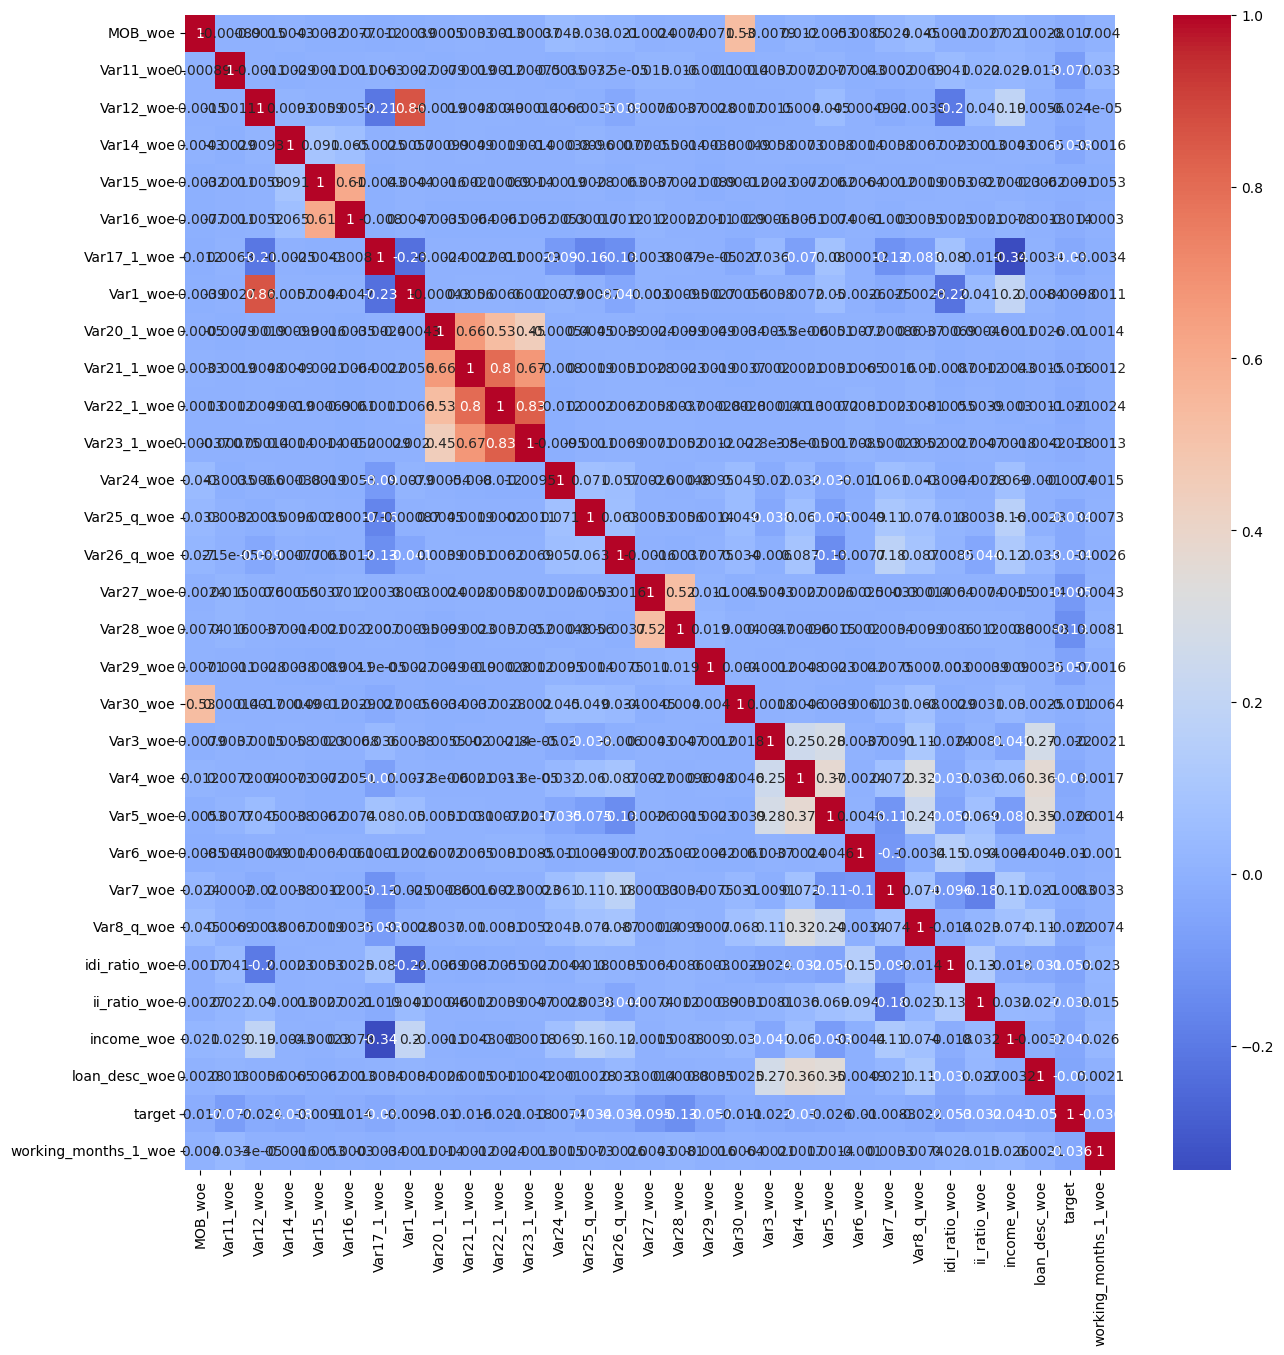

In [285]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_woe.corr(method='kendall')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [286]:
# find all paris of columns with correlation > 0.6 and write them as pairs
correlated_columns = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i, j]) > 0.6:
            correlated_columns.append([corr.columns[i], corr.columns[j]])

In [287]:
correlated_columns

[['Var12_woe', 'Var1_woe'],
 ['Var15_woe', 'Var16_woe'],
 ['Var20_1_woe', 'Var21_1_woe'],
 ['Var21_1_woe', 'Var22_1_woe'],
 ['Var21_1_woe', 'Var23_1_woe'],
 ['Var22_1_woe', 'Var23_1_woe']]

In [288]:
# modify correlated_columns to df with 2 columns var1 and var2
correlated_columns_df = pd.DataFrame(correlated_columns, columns=['var1', 'var2'])
correlated_columns_df

,var1,var2
0,Var12_woe,Var1_woe
1,Var15_woe,Var16_woe
2,Var20_1_woe,Var21_1_woe
3,Var21_1_woe,Var22_1_woe
4,Var21_1_woe,Var23_1_woe
5,Var22_1_woe,Var23_1_woe


In [289]:
df_iv['variable'] = df_iv['variable'] + '_woe'

In [290]:
# find iv for var1 and var2 in correlated_columns_df 
correlated_columns_df = correlated_columns_df.merge(df_iv, how='left', left_on='var1', right_on='variable')
correlated_columns_df.drop(columns=['variable'], inplace=True)

correlated_columns_df = correlated_columns_df.merge(df_iv, how='left', left_on='var2', right_on='variable')
correlated_columns_df.drop(columns=['variable'], inplace=True)

correlated_columns_df

,var1,var2,iv_x,iv_y
0,Var12_woe,Var1_woe,0.028132,0.003693
1,Var15_woe,Var16_woe,0.006377,0.009623
2,Var20_1_woe,Var21_1_woe,0.005253,0.012588
3,Var21_1_woe,Var22_1_woe,0.012588,0.016821
4,Var21_1_woe,Var23_1_woe,0.012588,0.012936
5,Var22_1_woe,Var23_1_woe,0.016821,0.012936


In [291]:
# take the names of the columns with higher IV from correlated_columns_df
columns_to_drop = []
for i in range(correlated_columns_df.shape[0]):
    if correlated_columns_df['iv_x'][i] > correlated_columns_df['iv_y'][i]:
        columns_to_drop.append(correlated_columns_df['var2'][i])
    else:
        columns_to_drop.append(correlated_columns_df['var1'][i])

In [292]:
columns_to_drop

['Var1_woe',
 'Var15_woe',
 'Var20_1_woe',
 'Var21_1_woe',
 'Var21_1_woe',
 'Var23_1_woe']

In [293]:
columns_final_df = columns_to_keep.difference(columns_to_drop)
columns_final_df

Index(['MOB_woe', 'Var11_woe', 'Var12_woe', 'Var14_woe', 'Var16_woe',
       'Var17_1_woe', 'Var22_1_woe', 'Var24_woe', 'Var25_q_woe', 'Var26_q_woe',
       'Var27_woe', 'Var28_woe', 'Var29_woe', 'Var30_woe', 'Var3_woe',
       'Var4_woe', 'Var5_woe', 'Var6_woe', 'Var7_woe', 'Var8_q_woe',
       'idi_ratio_woe', 'ii_ratio_woe', 'income_woe', 'loan_desc_woe',
       'target', 'working_months_1_woe'],
      dtype='object')

In [294]:
# move target column to the beginning
columns_final_df = columns_final_df.drop('target')
columns_final_df = columns_final_df.insert(0, 'target')
columns_final_df

Index(['target', 'MOB_woe', 'Var11_woe', 'Var12_woe', 'Var14_woe', 'Var16_woe',
       'Var17_1_woe', 'Var22_1_woe', 'Var24_woe', 'Var25_q_woe', 'Var26_q_woe',
       'Var27_woe', 'Var28_woe', 'Var29_woe', 'Var30_woe', 'Var3_woe',
       'Var4_woe', 'Var5_woe', 'Var6_woe', 'Var7_woe', 'Var8_q_woe',
       'idi_ratio_woe', 'ii_ratio_woe', 'income_woe', 'loan_desc_woe',
       'working_months_1_woe'],
      dtype='object')

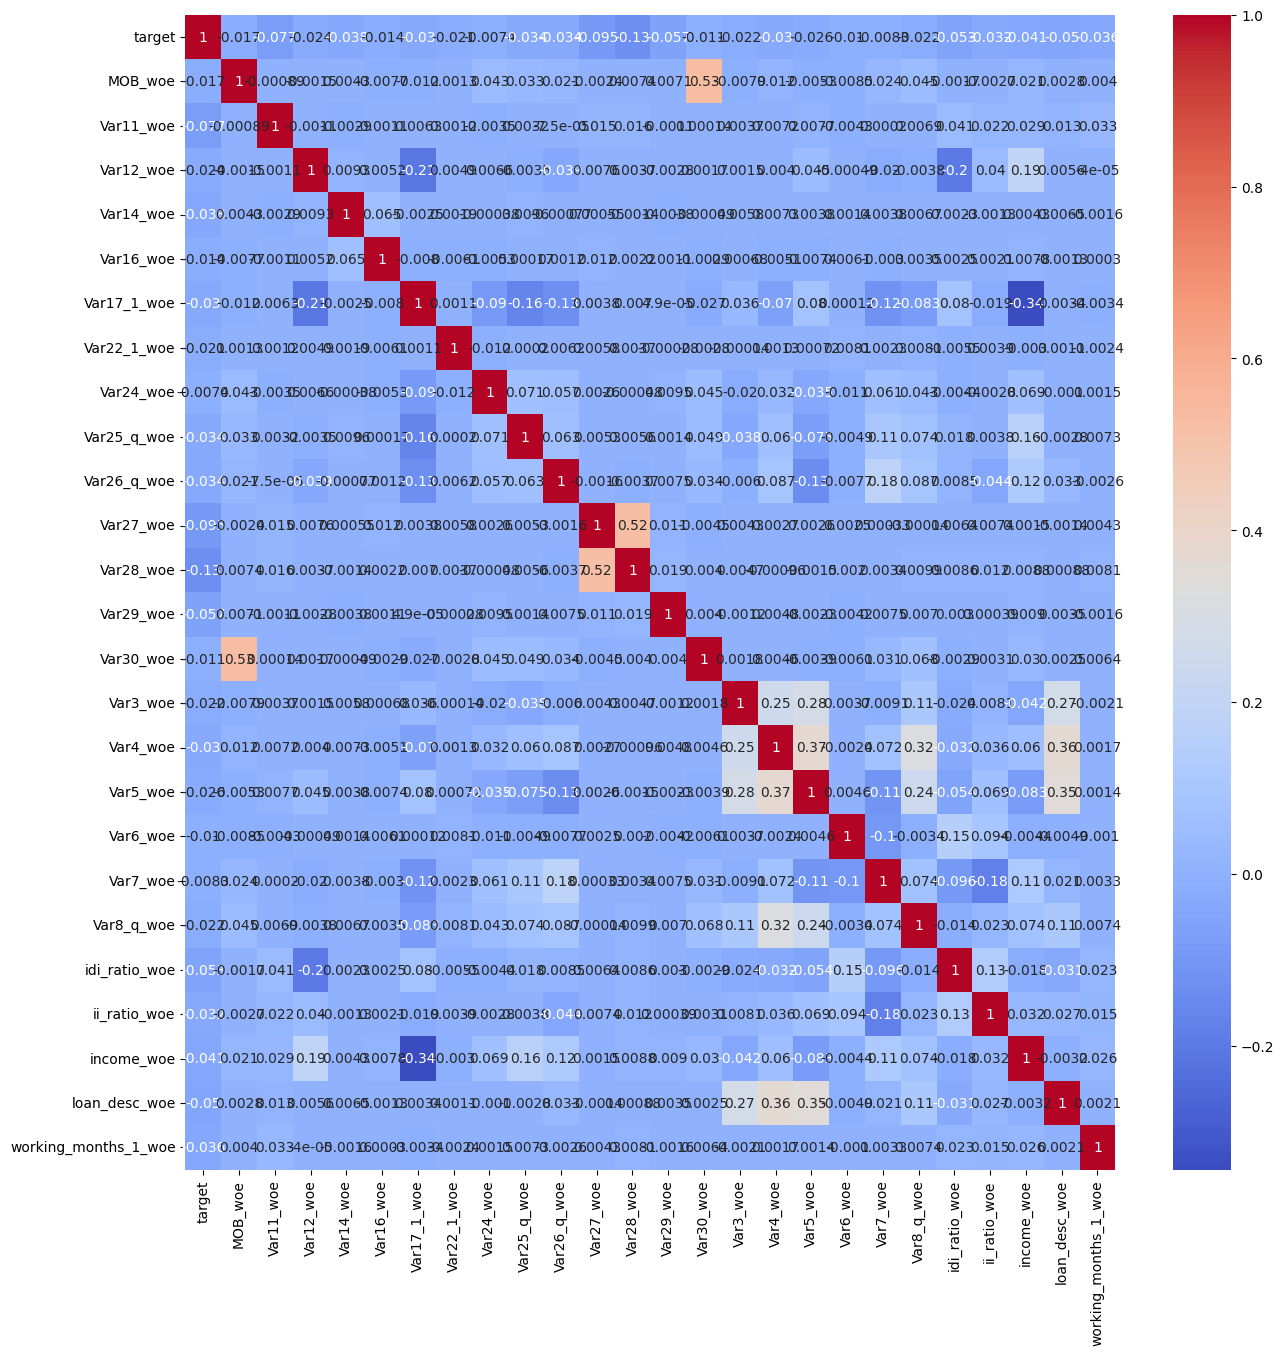

In [295]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_woe[columns_final_df].corr(method='kendall')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Coarse classing

In [296]:
columns_final_df

Index(['target', 'MOB_woe', 'Var11_woe', 'Var12_woe', 'Var14_woe', 'Var16_woe',
       'Var17_1_woe', 'Var22_1_woe', 'Var24_woe', 'Var25_q_woe', 'Var26_q_woe',
       'Var27_woe', 'Var28_woe', 'Var29_woe', 'Var30_woe', 'Var3_woe',
       'Var4_woe', 'Var5_woe', 'Var6_woe', 'Var7_woe', 'Var8_q_woe',
       'idi_ratio_woe', 'ii_ratio_woe', 'income_woe', 'loan_desc_woe',
       'working_months_1_woe'],
      dtype='object')

In [297]:
# select variables from df_iv where iv > 0.02 and write just varible names to list
df_iv1 = df_iv[df_iv['iv'] < 0.02]

cols_to_drop = list(df_iv1['variable'])

In [298]:
cols_to_drop

['Var22_1_woe',
 'MOB_woe',
 'Var23_1_woe',
 'Var21_1_woe',
 'Var16_woe',
 'Var30_woe',
 'Var15_woe',
 'Var20_1_woe',
 'Var6_woe',
 'Var1_woe',
 'Var7_woe',
 'Var24_woe']

In [299]:
columns_final_df

Index(['target', 'MOB_woe', 'Var11_woe', 'Var12_woe', 'Var14_woe', 'Var16_woe',
       'Var17_1_woe', 'Var22_1_woe', 'Var24_woe', 'Var25_q_woe', 'Var26_q_woe',
       'Var27_woe', 'Var28_woe', 'Var29_woe', 'Var30_woe', 'Var3_woe',
       'Var4_woe', 'Var5_woe', 'Var6_woe', 'Var7_woe', 'Var8_q_woe',
       'idi_ratio_woe', 'ii_ratio_woe', 'income_woe', 'loan_desc_woe',
       'working_months_1_woe'],
      dtype='object')

In [300]:
columns_final_df = columns_final_df.difference(cols_to_drop)

In [301]:
columns_final_df

Index(['Var11_woe', 'Var12_woe', 'Var14_woe', 'Var17_1_woe', 'Var25_q_woe',
       'Var26_q_woe', 'Var27_woe', 'Var28_woe', 'Var29_woe', 'Var3_woe',
       'Var4_woe', 'Var5_woe', 'Var8_q_woe', 'idi_ratio_woe', 'ii_ratio_woe',
       'income_woe', 'loan_desc_woe', 'target', 'working_months_1_woe'],
      dtype='object')

In [302]:
df = df_woe[columns_final_df]

In [303]:
# save final df with WOE values
# df_woe[columns_final_df].to_csv('../data/output/categorical_dfs/development_sample_woe.csv', index = False)

# save also columns_final_df

# pd.DataFrame(columns_final_df).to_csv('../data/output/categorical_dfs/columns_final_woe.csv', index = False)

# tu się kończy testing

In [304]:
df_woe_all

,variable,category,target,non_target,total_target,total_non_target,woe,iv
0,MOB,0.0,126.0,3741.0,1101.0,34599.0,0.944802,-0.005968
1,MOB,1.0,96.0,3252.0,1101.0,34599.0,1.077961,0.007328
2,MOB,2.0,127.0,3439.0,1101.0,34599.0,0.861692,-0.013747
3,MOB,3.0,102.0,3577.0,1101.0,34599.0,1.115944,0.011987
4,MOB,4.0,99.0,3479.0,1101.0,34599.0,1.118261,0.011891
...,...,...,...,...,...,...,...,...
5,idi_ratio,5.0,79.0,3491.0,1101.0,34599.0,1.406198,0.040985
6,idi_ratio,6.0,98.0,3472.0,1101.0,34599.0,1.127398,0.012784
7,idi_ratio,7.0,113.0,3457.0,1101.0,34599.0,0.973520,-0.002646
8,idi_ratio,8.0,102.0,3468.0,1101.0,34599.0,1.081939,0.008213


In [305]:
# delete sufix '_woe' from columns_final_df if the name is different than 'target'
columns_final_df_without_suffix = [x[:-4] if x.endswith('_woe') and x != 'target' else x for x in columns_final_df]
columns_final_df_without_suffix

['Var11',
 'Var12',
 'Var14',
 'Var17_1',
 'Var25_q',
 'Var26_q',
 'Var27',
 'Var28',
 'Var29',
 'Var3',
 'Var4',
 'Var5',
 'Var8_q',
 'idi_ratio',
 'ii_ratio',
 'income',
 'loan_desc',
 'target',
 'working_months_1']

In [306]:
import matplotlib.pyplot as plt

### Var11_woe

In [307]:
columns_final_df_without_suffix

['Var11',
 'Var12',
 'Var14',
 'Var17_1',
 'Var25_q',
 'Var26_q',
 'Var27',
 'Var28',
 'Var29',
 'Var3',
 'Var4',
 'Var5',
 'Var8_q',
 'idi_ratio',
 'ii_ratio',
 'income',
 'loan_desc',
 'target',
 'working_months_1']

In [216]:
def create_barplot(df, variable):
    df_var = df_woe_all.loc[df_woe_all['variable'] == variable, ['category', 'woe']]

    plt.figure(figsize=(10, 5))
    plt.bar(df_var['category'], df_var['woe'])
    plt.xlabel('Category')
    plt.ylabel('WOE')
    plt.bar_label(plt.bar(df_var['category'], df_var['woe']))
    plt.title('WOE for ' + variable)

In [310]:
columns_to_iterate = columns_final_df_without_suffix.copy()
columns_to_iterate.remove('target')

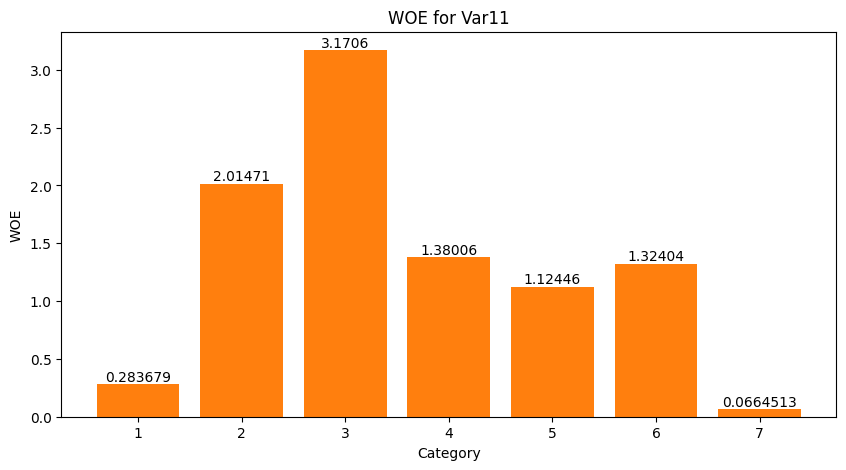

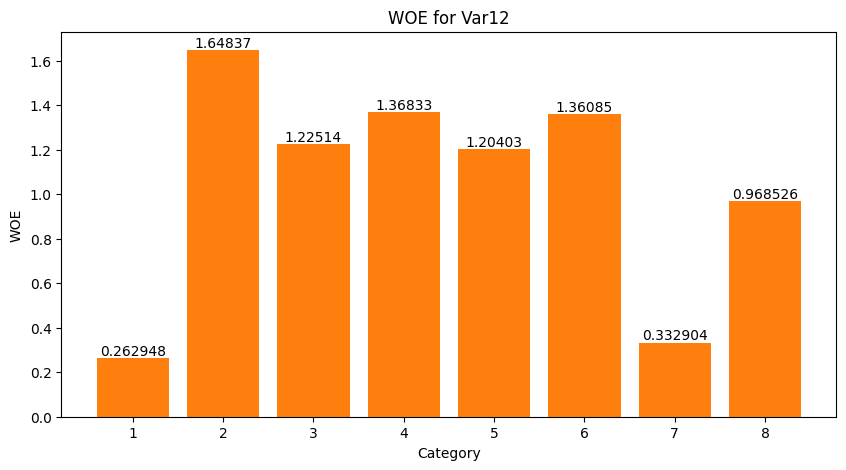

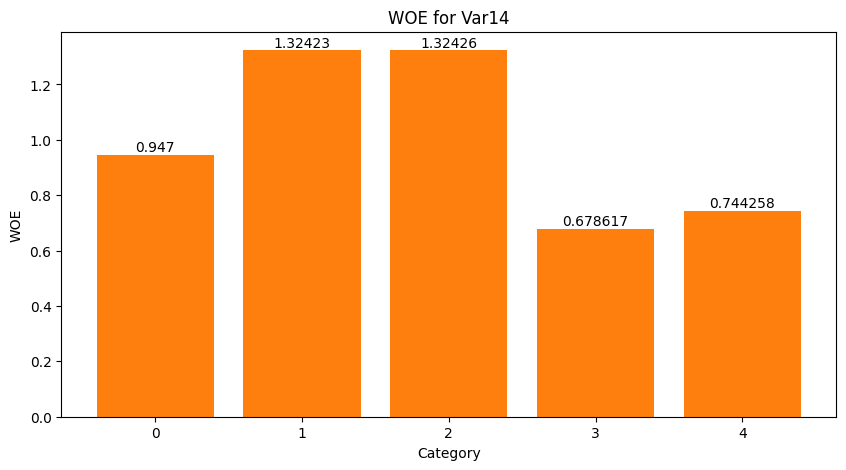

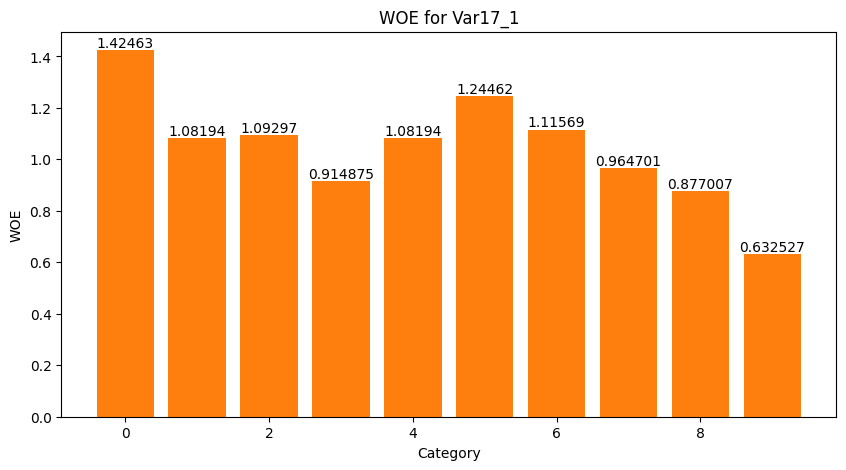

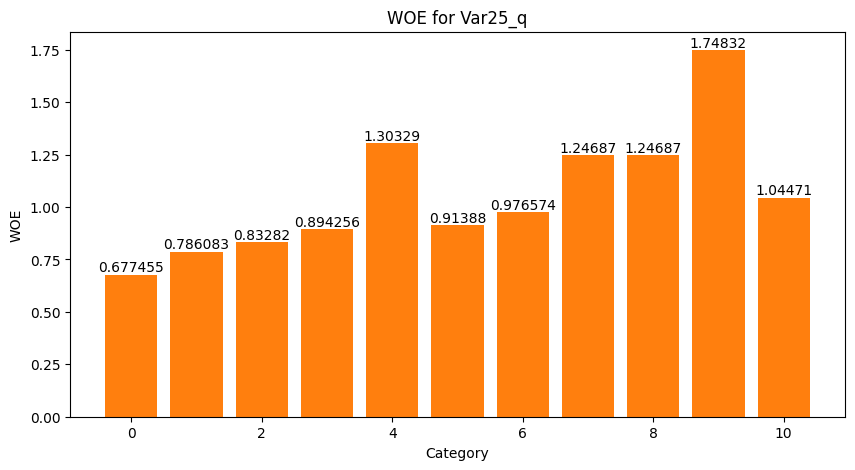

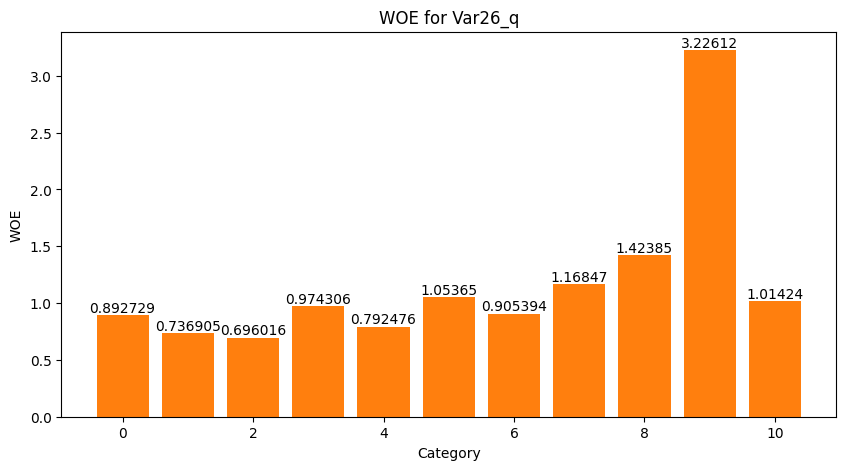

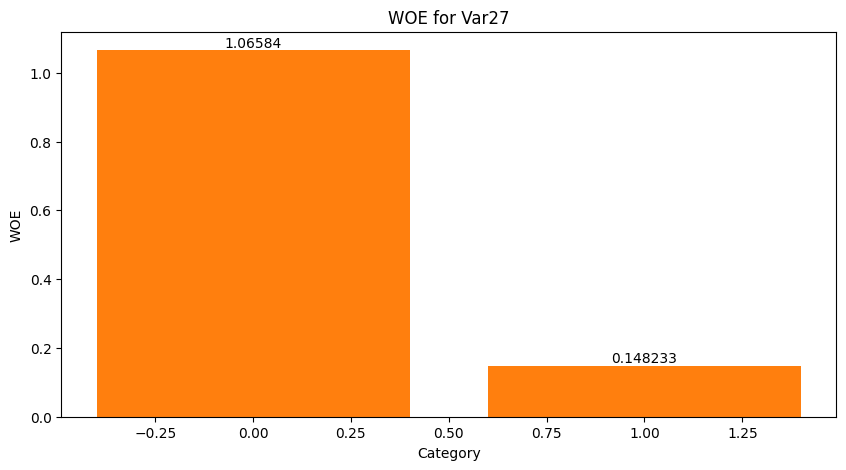

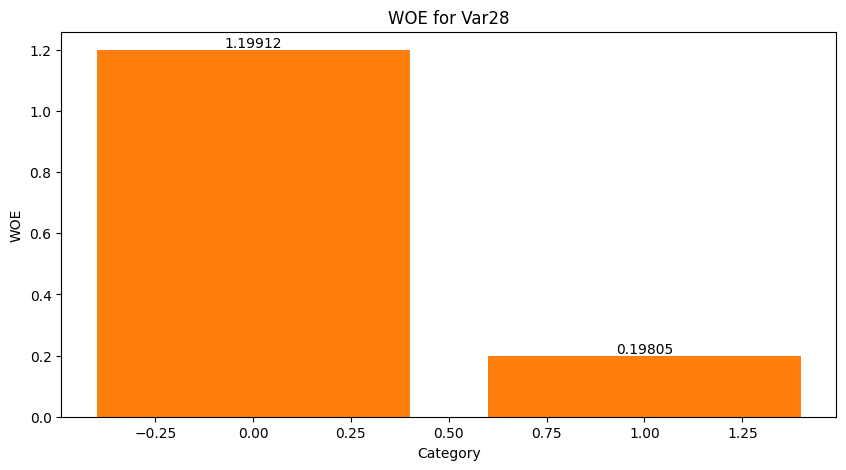

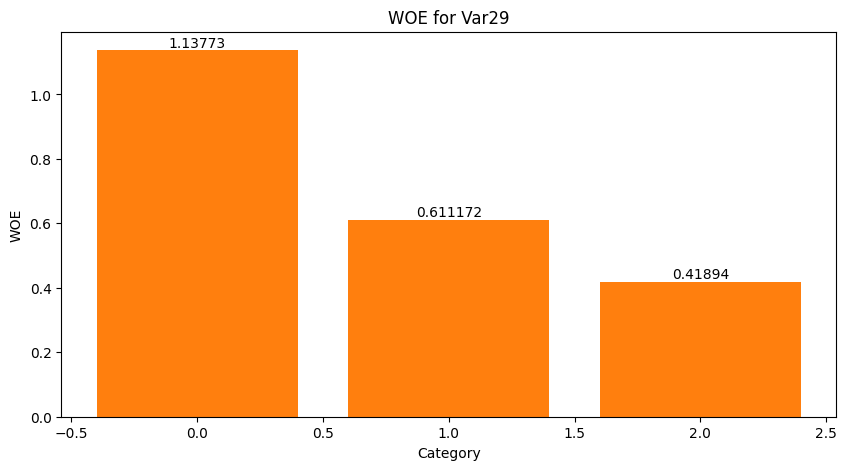

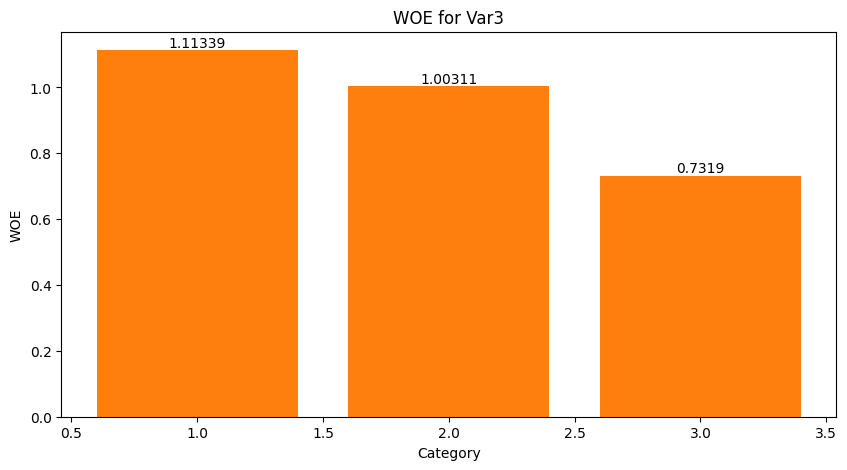

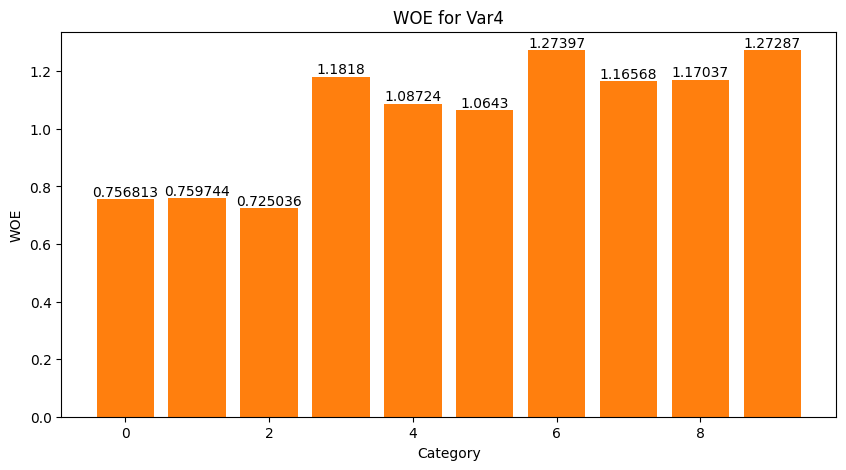

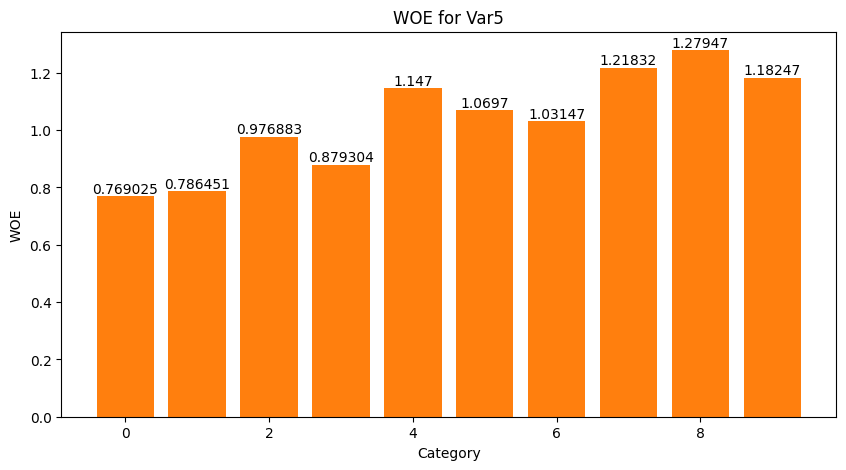

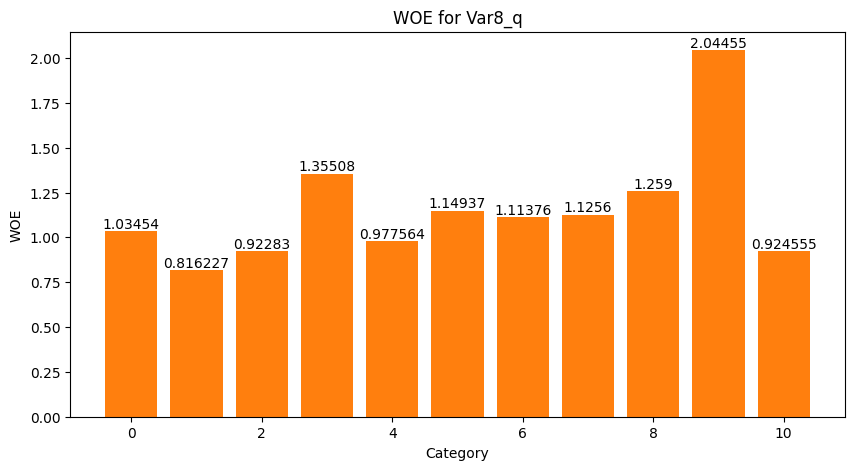

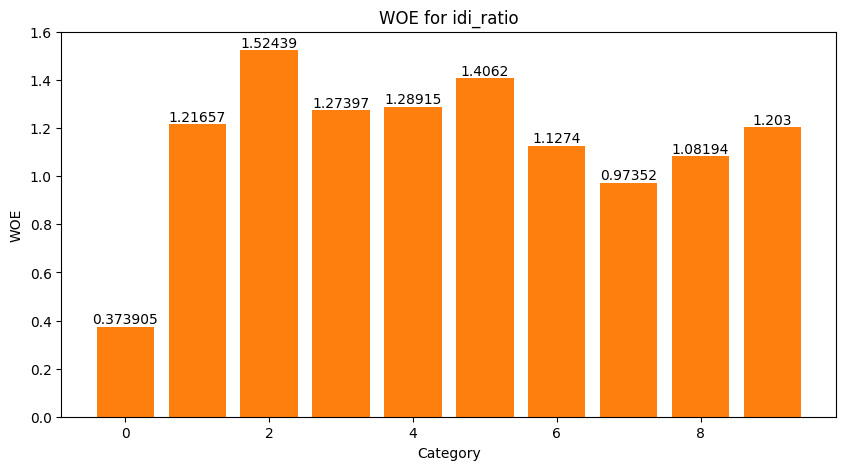

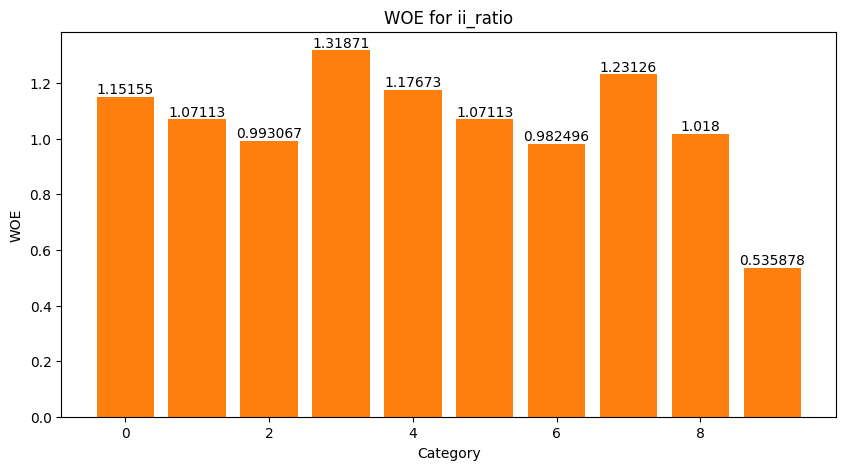

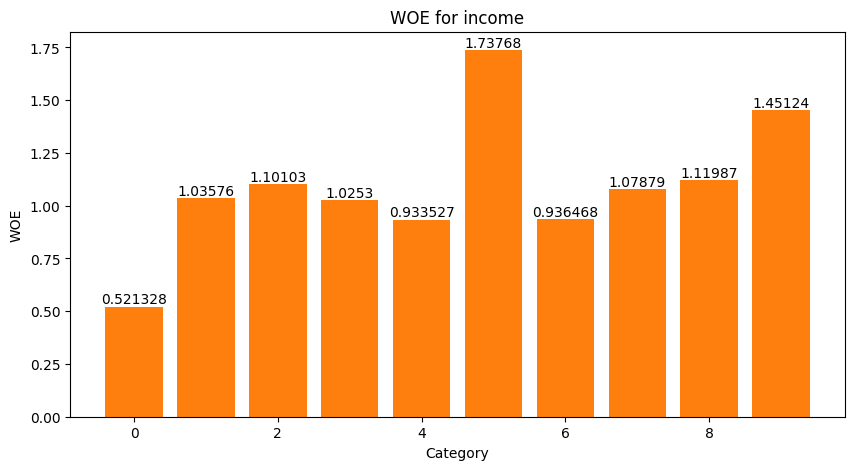

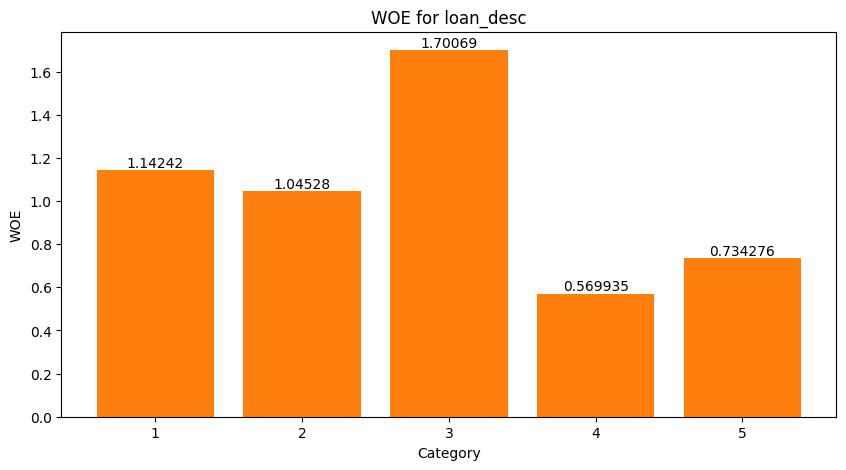

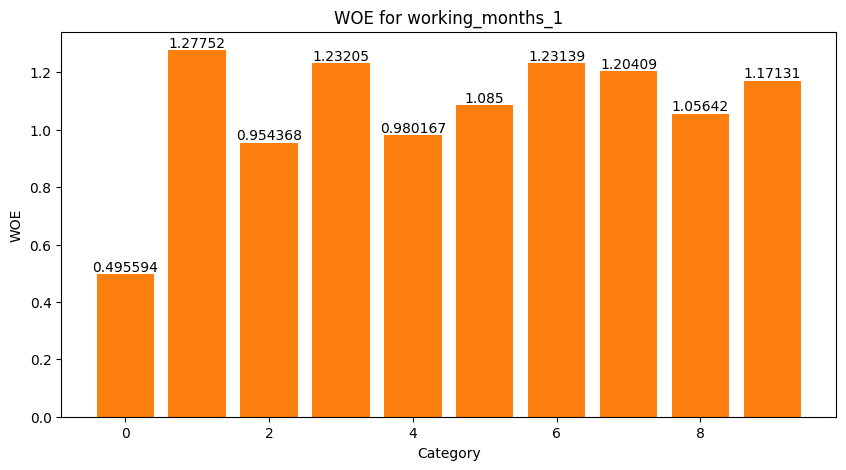

In [311]:
for name in columns_to_iterate:
    create_barplot(df_woe_all, name)